# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
len(cities)


595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
query_url =  f"{url}appid={api_key}&units={units}&q="

In [4]:
#Perform a weather check on each city using a series of successive API calls.
#Set up lists to hold response info
city_number=[]
city_name=[]
city_country=[]
date=[]
temperature=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
lat=[]
lon=[]

#Set starter count, Loop through cities to check weather in each city, then print City & City ID
count=1 
print('Processing City Data')
print('------------------------')
for city in cities:
    response = requests.get(query_url + city).json()
   #Include a print log of each city as it'sbeing processed (with the city number and city name). 
    print('Processing Record ' + str(count) + ' of ' + str(len(cities))+ ' : ' + city)
    
    try:
        city_number.append(response['id'])
        city_name.append(response['name'])
        city_country.append(response['sys']['country'])
        temperature.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        date.append(response['dt'])
        
    except:
        print(f"City record not found, searching for next record..")
        
    count=count+1

Processing City Data
------------------------
Processing Record 1 of 595 : punta arenas
Processing Record 2 of 595 : isangel
Processing Record 3 of 595 : kaitangata
Processing Record 4 of 595 : mataura
Processing Record 5 of 595 : buqayq
City record not found, searching for next record..
Processing Record 6 of 595 : ilulissat
Processing Record 7 of 595 : phan thiet
Processing Record 8 of 595 : ribeira grande
Processing Record 9 of 595 : atuona
Processing Record 10 of 595 : cape town
Processing Record 11 of 595 : milkovo
Processing Record 12 of 595 : amderma
City record not found, searching for next record..
Processing Record 13 of 595 : bredasdorp
Processing Record 14 of 595 : batesville
Processing Record 15 of 595 : rikitea
Processing Record 16 of 595 : dikson
Processing Record 17 of 595 : sungaipenuh
Processing Record 18 of 595 : jamestown
Processing Record 19 of 595 : albany
Processing Record 20 of 595 : la palma
Processing Record 21 of 595 : hilo
Processing Record 22 of 595 : tasii

Processing Record 188 of 595 : khanpur
Processing Record 189 of 595 : biltine
Processing Record 190 of 595 : mehamn
Processing Record 191 of 595 : tra vinh
Processing Record 192 of 595 : yerbogachen
Processing Record 193 of 595 : biloela
Processing Record 194 of 595 : galle
Processing Record 195 of 595 : tiksi
Processing Record 196 of 595 : doctor arroyo
Processing Record 197 of 595 : ponta do sol
Processing Record 198 of 595 : paka
Processing Record 199 of 595 : cidreira
Processing Record 200 of 595 : sesheke
Processing Record 201 of 595 : beyneu
Processing Record 202 of 595 : kruisfontein
Processing Record 203 of 595 : merke
Processing Record 204 of 595 : marrakesh
Processing Record 205 of 595 : guerrero negro
Processing Record 206 of 595 : zemio
Processing Record 207 of 595 : hofn
Processing Record 208 of 595 : berbera
Processing Record 209 of 595 : tigil
Processing Record 210 of 595 : naze
Processing Record 211 of 595 : teberda
Processing Record 212 of 595 : kargil
Processing Recor

Processing Record 371 of 595 : ouadda
Processing Record 372 of 595 : lompoc
Processing Record 373 of 595 : clinton
Processing Record 374 of 595 : marsa matruh
Processing Record 375 of 595 : dalaba
Processing Record 376 of 595 : teahupoo
Processing Record 377 of 595 : laguna
Processing Record 378 of 595 : strezhevoy
Processing Record 379 of 595 : makakilo city
Processing Record 380 of 595 : ponta pora
Processing Record 381 of 595 : mwene-ditu
Processing Record 382 of 595 : ewa beach
Processing Record 383 of 595 : santa elena
Processing Record 384 of 595 : goryachiy klyuch
Processing Record 385 of 595 : novo aripuana
Processing Record 386 of 595 : porto de moz
Processing Record 387 of 595 : mersing
Processing Record 388 of 595 : anadyr
Processing Record 389 of 595 : peskovka
Processing Record 390 of 595 : caravelas
Processing Record 391 of 595 : kargasok
Processing Record 392 of 595 : gunjur
Processing Record 393 of 595 : puerto maldonado
Processing Record 394 of 595 : dali
Processing Re

Processing Record 556 of 595 : salym
Processing Record 557 of 595 : torrijos
Processing Record 558 of 595 : galveston
Processing Record 559 of 595 : mogok
Processing Record 560 of 595 : miyako
Processing Record 561 of 595 : saint-louis
Processing Record 562 of 595 : ulladulla
Processing Record 563 of 595 : sergeyevka
Processing Record 564 of 595 : maridi
Processing Record 565 of 595 : golden
Processing Record 566 of 595 : hobyo
Processing Record 567 of 595 : caen
Processing Record 568 of 595 : monte alegre
Processing Record 569 of 595 : saryshagan
City record not found, searching for next record..
Processing Record 570 of 595 : anderson
Processing Record 571 of 595 : omsukchan
Processing Record 572 of 595 : lamu
Processing Record 573 of 595 : polunochnoye
Processing Record 574 of 595 : channel-port aux basques
Processing Record 575 of 595 : vila
Processing Record 576 of 595 : ostersund
Processing Record 577 of 595 : archdale
Processing Record 578 of 595 : plainview
Processing Record 57

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Convert to Raw DataFrame

weather_df = pd.DataFrame({'City':city_name,
                'Country': city_country,
                'Temperature': temperature,
                'Max Temp': max_temp,
                'Humidity': humidity,
                'Cloudiness':cloudiness,
                'Wind Speed': wind_speed,
                'Latitude': lat,
                'Longitude':lon})
weather_df

,City,Country,Temperature,Max Temp,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,Punta Arenas,CL,62.29,62.60,63,0,2.30,-53.1500,-70.9167
1,Isangel,VU,84.20,84.20,74,75,9.22,-19.5500,169.2667
2,Kaitangata,NZ,57.00,57.00,90,100,4.00,-46.2817,169.8464
3,Mataura,NZ,59.20,59.20,65,100,9.31,-46.1927,168.8643
4,Ilulissat,GL,17.60,17.60,45,0,12.66,69.2167,-51.1000
...,...,...,...,...,...,...,...,...,...
543,Iralaya,HN,76.96,76.96,80,1,9.80,15.0000,-83.2333
544,Sozimskiy,RU,-23.57,-23.57,86,0,3.74,59.7418,52.2482
545,Porbandar,IN,55.40,55.40,82,20,3.44,21.6422,69.6093
546,Tautira,PF,84.09,84.20,61,75,14.97,-17.7333,-149.1500


In [6]:
weather_df.count()

City           548
Country        548
Temperature    548
Max Temp       548
Humidity       548
Cloudiness     548
Wind Speed     548
Latitude       548
Longitude      548
dtype: int64

In [7]:
weather_df.to_csv("Output_Results/Weather_Dict.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
high_humidity = weather_df.loc[weather_df['Humidity'] > 100,:]
high_humidity

,City,Country,Temperature,Max Temp,Humidity,Cloudiness,Wind Speed,Latitude,Longitude


In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [11]:
weather_df.head()

,City,Country,Temperature,Max Temp,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,Punta Arenas,CL,62.29,62.6,63,0,2.30,-53.1500,-70.9167
1,Isangel,VU,84.20,84.2,74,75,9.22,-19.5500,169.2667
2,Kaitangata,NZ,57.00,57.0,90,100,4.00,-46.2817,169.8464
3,Mataura,NZ,59.20,59.2,65,100,9.31,-46.1927,168.8643
4,Ilulissat,GL,17.60,17.6,45,0,12.66,69.2167,-51.1000


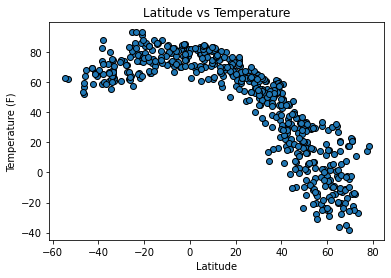

In [12]:
#Scatterplot Lat vs Temp
plt.scatter(weather_df['Latitude'], weather_df['Temperature'], edgecolor='black')
#Set Axis Labels & Title
plt.title('Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('Output_Results/lat_temp_scatter.png')

The Latitude vs Temperature plot demonstrates how their latitude, or distance from the equator, effects the temperature in a city.

## Latitude vs. Humidity Plot

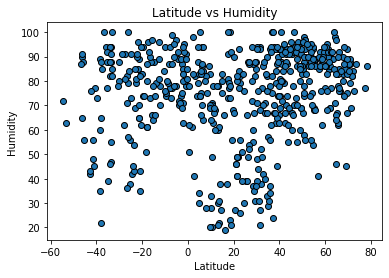

In [13]:
#Scatterplot Lat vs Humidity
plt.scatter(weather_df['Latitude'], weather_df['Humidity'], edgecolor='black')
#Set Axis Labels & Title
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('Output_Results/lat_humidity_scatter.png')

The Latitude vs Humidity Plot demonstrates that there is little correlation between the humidity and latitude coordinates.

## Latitude vs. Cloudiness Plot

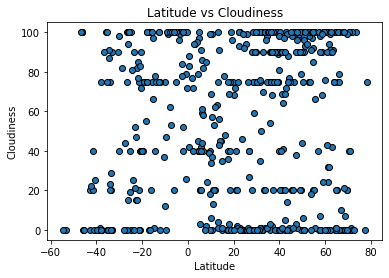

In [14]:
#Scatterplot Lat vs Cloudiness
plt.scatter(weather_df['Latitude'], weather_df['Cloudiness'], edgecolor='black')
#Set Axis Labels & Title
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('Output_Results/lat_cloud_scatter.png')

The Latitude vs Cloudiness Plot demonstrates that there is little correlation between the cloudiness and latitude coordinates.

# Latitude vs. Wind Speed Plot

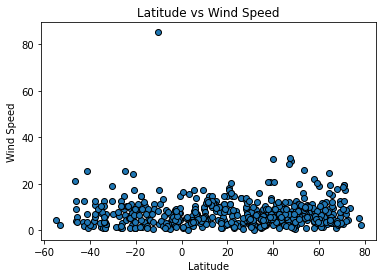

In [15]:
#Scatterplot Lat vs Wind Speed
plt.scatter(weather_df['Latitude'], weather_df['Wind Speed'], edgecolor='black')
#Set Axis Labels & Title
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('Output_Results/lat_wind_scatter.png')

The Latitude vs Wind Speed Plot demonstrates that there is little correlation between wind speed and latitude coordinates.

## Linear Regression

In [16]:
#set hemispheres
northern = weather_df.loc[weather_df['Latitude'] >= 0]
southern = weather_df.loc[weather_df['Latitude'] < 0]
#Set linear regression model & Scatter plots
def linear_regression(xvalues,yvalues):
    cor_co = st.pearsonr(xvalues, yvalues)
    print(f"The r-squared is: {round(cor_co[0],2)}.")
    (slope, intercept, rvalue, pvalue, stderr)= linregress(xvalues, yvalues)
    rvalues = xvalues * slope + intercept
    linear_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
    plt.scatter(xvalues, yvalues)
    plt.plot(xvalues, rvalues, "r-")
    return linear_eq

#Set annotation function
def annotate(linear_eq, a, b):
    plt.annotate(linear_eq, (a,b), fontsize=13, color='black')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.88.


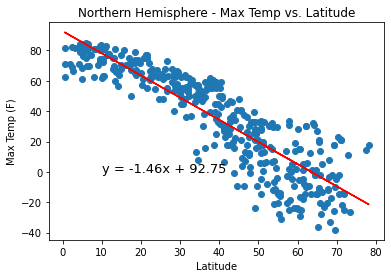

In [17]:
#Plot LinReg & annotate 
northern_maxtemp = linear_regression(northern['Latitude'], northern['Max Temp'])
annotate(northern_maxtemp, 10, 0)
#Set Axis Labels & Title
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.savefig('Output_Results/northern_temp_lat_linreg.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.54.


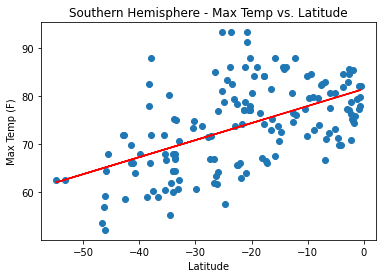

In [18]:
#Plot LinReg & annotate 
southern_maxtemp = linear_regression(southern['Latitude'], southern['Max Temp'])
annotate(southern_maxtemp, -30, 50)
#Set Axis Labels & Title
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.savefig('Output_Results/southern_temp_lat_linreg.png')

Latitude is defined by the distance from the equator. The Linear Regression for Max Temp vs Latitude shows that the closer a city is to the equator, the warmer it is. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.36.


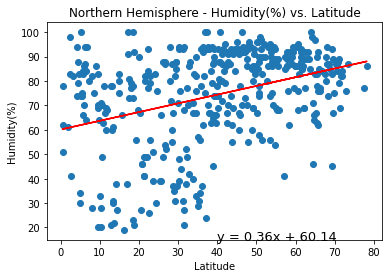

In [19]:
#Plot LinReg & annotate 
northern_humidity = linear_regression(northern['Latitude'], northern['Humidity'])
annotate(northern_humidity, 40, 15)
#Set Axis Labels & Title
plt.title('Northern Hemisphere - Humidity(%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.savefig('Output_Results/northern_humidity_linreg.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.24.


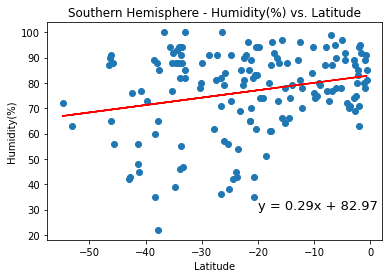

In [20]:
#Plot LinReg & annotate 
southern_humidity = linear_regression(southern['Latitude'], southern['Humidity'])
annotate(southern_humidity, -20, 30)
#Set Axis Labels & Title
plt.title('Southern Hemisphere - Humidity(%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.savefig('Output_Results/southern_humidity_linreg.png')

There is greater humidity when closer to the equator. The lower the latitude, the higher the humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07.


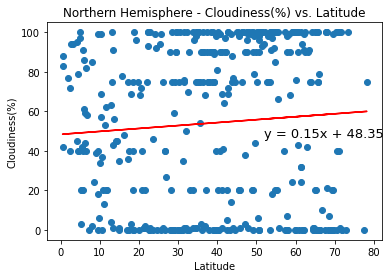

In [21]:
#Plot LinReg & annotate 
northern_cloudiness = linear_regression(northern['Latitude'], northern['Cloudiness'])
annotate(northern_cloudiness, 52, 47)
#Set Axis Labels & Title
plt.title('Northern Hemisphere - Cloudiness(%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.savefig('Output_Results/northern_cloudiness_linreg.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.46.


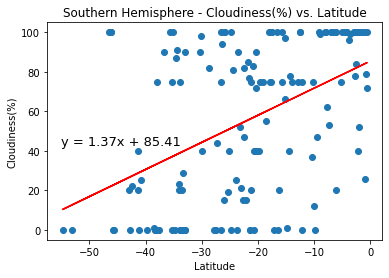

In [22]:
#Plot LinReg & annotate 
southern_cloudiness = linear_regression(southern['Latitude'], southern['Cloudiness'])
annotate(southern_cloudiness, -55, 43)
#Set Axis Labels & Title
plt.title('Southern Hemisphere - Cloudiness(%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.savefig('Output_Results/southern_cloudiness_linreg.png')

The Latitude does not have an affect on cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03.


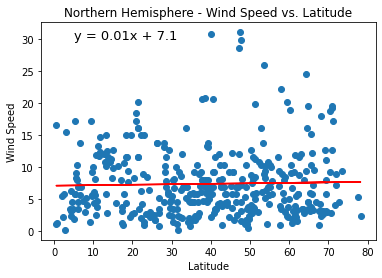

In [23]:
#Plot LinReg & annotate 
northern_wind = linear_regression(northern['Latitude'], northern['Wind Speed'])
annotate(northern_wind, 5, 30)
#Set Axis Labels & Title
plt.title('Northern Hemisphere - Wind Speed vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('Output_Results/northern_wind_linreg.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.46.


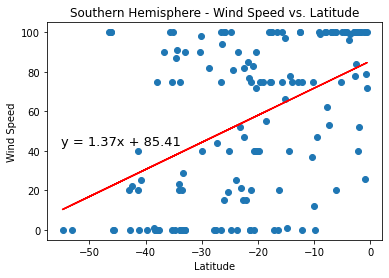

In [24]:
#Plot LinReg & annotate 
southern_wind = linear_regression(southern['Latitude'], southern['Cloudiness'])
annotate(southern_wind, -55, 43)
#Set Axis Labels & Title
plt.title('Southern Hemisphere - Wind Speed vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('Output_Results/southern_wind_linreg.png')

The Latitude does not have an affect on wind speed.